# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [109]:
# open dataset file
file = open("wifi_data.txt", "r")

# read samples from dataset file
data = []

for f in file:
    x = f.split()
    x = [int(i) for i in x]
    data.append(x)
    

In [110]:
# converting data into dataframe
df = pd.DataFrame(data, columns = ['r1','r2','r3','r4','r5','r6','r7','region'])
df.head()

,r1,r2,r3,r4,r5,r6,r7,region
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [111]:
df.shape

(2000, 8)

In [112]:
# shuffle dataframe first
df = df.sample(frac=1).reset_index()
del df['index']
df.head()

,r1,r2,r3,r4,r5,r6,r7,region
0,-13,-60,-63,-18,-70,-73,-73,2
1,-66,-53,-59,-62,-69,-81,-79,1
2,-55,-54,-43,-60,-51,-84,-88,4
3,-43,-53,-51,-42,-73,-71,-66,2
4,-59,-52,-50,-55,-49,-87,-86,4


## 1. Binary Classification

In [6]:
# drop data samples for class 2 and 4
df = df.drop(df.index[df['region']==2])
df = df.drop(df.index[df['region']==4])
df.shape

(1000, 8)

In [7]:
# 0 -> region 1  
# 1 -> region 3

df['region'] = df['region'].replace([1, 3], [0, 1])
df.head()

,r1,r2,r3,r4,r5,r6,r7,region
1,-67,-56,-62,-70,-69,-86,-84,0
2,-61,-52,-54,-63,-64,-84,-82,0
3,-62,-57,-59,-72,-73,-86,-82,0
5,-48,-55,-58,-50,-63,-81,-86,1
6,-60,-53,-59,-64,-70,-80,-90,0


In [8]:
X = df[['r1','r2', 'r3', 'r4', 'r5', 'r6', 'r7']]
X.head()

,r1,r2,r3,r4,r5,r6,r7
1,-67,-56,-62,-70,-69,-86,-84
2,-61,-52,-54,-63,-64,-84,-82
3,-62,-57,-59,-72,-73,-86,-82
5,-48,-55,-58,-50,-63,-81,-86
6,-60,-53,-59,-64,-70,-80,-90


In [9]:
y = df['region']
y.head()

1    0
2    0
3    0
5    1
6    0
Name: region, dtype: int64

### Split test/train data

In [10]:
# 80% of data should be used as training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 7)
(800,)
(200, 7)
(200,)


### Model
using Gradient Descent

In [11]:
n = X_train.shape[0]   # number of training samples
X_train = np.concatenate((np.ones((n, 1)), X_train), axis=1)   # add a coloumn of ones to X (for future calculations)

In [18]:
learning_rate = 0.001
iterations = 1000
m = X_train.shape[1]   # number of features
W = np.random.randn(m, )

In [19]:
# main part of approach
grad = np.zeros(len(W))
cost_list = []

for i in range(iterations):
    y_hat = 1 / (1 + np.exp(-1*(X_train@W)))
    
    # update parameters after considering all samples
    grad = ((y_hat - y_train)@X_train)/n
    W -= learning_rate * grad
        
    # calculate J
    cost = (-1/n) * np.sum(y_train*np.log(y_hat)+(1-y_train)*np.log(1-y_hat))
    cost_list.append(cost)
    
    
print(cost_list[-1])    
print(W)

0.2576246887983437
[-0.2544289   0.82304197 -0.59722643  0.02694467  0.90096536 -0.53074833
 -1.0350175   0.63354899]


Text(0, 0.5, 'J')

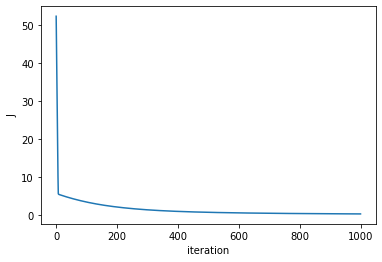

In [20]:
# Plot cost values in each iteration
iteration = np.array([i for i in range(len(cost_list))])
plt.plot(iteration, cost_list)
plt.xlabel('iteration')
plt.ylabel('J')

### Prediction for test data
Precision and Confusion Matrix

In [21]:
n_test = X_test.shape[0]   # number of test samples
X_test = np.concatenate((np.ones((n_test, 1)), X_test), axis=1)   # add a coloumn of ones to X (for future calculations)

Precision: 0.928


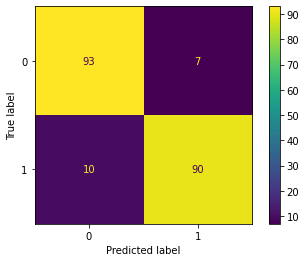

In [22]:
y_pred = 1 / (1 + np.exp(-1*(X_test@W)))

preds = [1 if p>=0.5 else 0 for p in y_pred]

print('Precision: %.3f' % precision_score(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 2. Adding Regularization

In [93]:
learning_rate = 0.001
iterations = 1000
m = X_train.shape[1]   # number of features
# W = np.random.randn(m, )

In [106]:
W = np.array([ 0.99114951, -0.93399528,  1.39452542,  0.555887  ,  0.89130126, 1.43942712,  0.39526934, -0.26474118])

In [107]:
# main part of approach
lamb = 0  # testing 5, 0, 1, 2
grad = np.zeros(len(W))
cost_list = []

for i in range(iterations):
    y_hat = 1 / (1 + np.exp(-1*(X_train@W)))
    
    # update parameters after considering all samples
    grad = (1/n)*((y_hat - y_train)@X_train) + (lamb/m)*W
    W -= learning_rate * grad
        
    # calculate J
    cost = (-1/n)*np.sum(y_train*np.log(y_hat)+(1-y_train)*np.log(1-y_hat)) + (lamb/(2*m))*np.sum(W**2)
    cost_list.append(cost)
    
    
print(cost_list[-1])    
print(W)

0.3088554939826559
[ 1.00635712 -0.3005353   0.29007843  0.29244772  1.08909487  0.69276553
 -0.60031328 -0.89288813]


Precision: 0.889


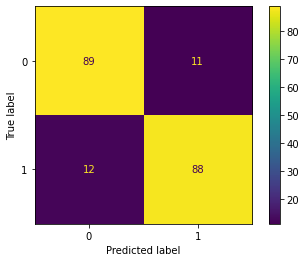

In [108]:
y_pred = 1 / (1 + np.exp(-1*(X_test@W)))

preds = [1 if p>=0.5 else 0 for p in y_pred]

print('Precision: %.3f' % precision_score(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 3. Multi-class Classification

In [113]:
X = df[['r1','r2', 'r3', 'r4', 'r5', 'r6', 'r7']]
X.head()

,r1,r2,r3,r4,r5,r6,r7
0,-13,-60,-63,-18,-70,-73,-73
1,-66,-53,-59,-62,-69,-81,-79
2,-55,-54,-43,-60,-51,-84,-88
3,-43,-53,-51,-42,-73,-71,-66
4,-59,-52,-50,-55,-49,-87,-86


In [114]:
y = df['region']
y.head()

0    2
1    1
2    4
3    2
4    4
Name: region, dtype: int64

In [115]:
# 80% of data should be used as training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 7)
(1600,)
(400, 7)
(400,)


### Model
using Gradient Descent

In [116]:
n = X_train.shape[0]   # number of training samples
X_train = np.concatenate((np.ones((n, 1)), X_train), axis=1)   # add a coloumn of ones to X (for future calculations)

In [117]:
np.array(y_train).reshape(-1,1)

array([[4],
       [1],
       [3],
       ...,
       [2],
       [3],
       [4]], dtype=int64)

In [118]:
# transforming the shape of y_train into 4 values for each sample
# When it is 1 it means that this sample is in the corresponding class
onehot_enc = OneHotEncoder(sparse=False)
y_encode = onehot_enc.fit_transform(np.array(y_train).reshape(-1,1))
y_encode

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [130]:
learning_rate = 0.001
iterations = 1000
m = X_train.shape[1]   # number of features
W = np.random.randn(m, y_encode.shape[1])

In [131]:
# main part of approach
grad = np.zeros(len(W))
cost_list = []

for i in range(iterations):
    # softmax instead of sigmoid function for multi-class 
    y_hat = 1 / (1 + np.exp(-1*(X_train@W)))

    # update parameters after considering all samples
    grad = (X_train.T@(y_hat - y_encode))/n
    W -= learning_rate * grad
        
    # calculate J
    cost = (-1/n) * (np.sum(np.log(np.exp(X_train@W)/np.sum(np.exp(X_train@W)))))
    cost_list.append(cost)
    
print(cost_list[-1])      
print(W)

265.45804113182766
[[ 0.74186308  1.35204565  0.24129774 -0.37426619]
 [-0.78648609  1.43871126 -0.11646156 -0.63698362]
 [ 0.6134685  -0.93229903 -0.37175643 -0.13855962]
 [ 0.22549296  0.4674892   0.3272313   0.35984259]
 [-0.20160738 -0.47051512  0.15072134 -1.3623374 ]
 [-0.48112174 -0.70906643  0.00643814  1.18619605]
 [ 0.89766646 -0.29949516  0.6420998   0.51955683]
 [-0.36399746  0.69284128 -0.59745418 -0.05251307]]


### Prediction for test data
Precision and Confusion Matrix

In [121]:
n_test = X_test.shape[0]   # number of test samples
X_test = np.concatenate((np.ones((n_test, 1)), X_test), axis=1)   # add a coloumn of ones to X (for future calculations)

Precision: 0.904


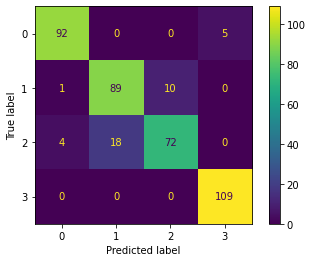

In [132]:
y_pred = 1 / (1 + np.exp(-1*(X_test@W)))

# max of each row (probability) is the predicted class for each sample
# add 1 to the result. because the argmax return the index with the max value. The predicted class is the index + 1
preds = np.argmax(y_pred, axis=1) + 1  

print('Precision: %.3f' % precision_score(y_test, preds, average='macro'))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()